#  Découvrez l’algorithme k-means - Exemple avec le dataset Iris

# Summary

Ce notebook est en lien le module sur les approches non supervisées

**Contexte**

- Le dataset Iris est l’un des jeux de données les plus célèbres en apprentissage automatique.

- Collecté par Ronald Fisher (1936).

- Objectif initial : classer des fleurs d’iris selon leur espèce à partir de mesures botaniques.


Nous allons travailler sur le jeu de données iris.


------------------------------
**Contenu du dataset**

Le jeu de données contient 150 observations (fleurs), réparties en 3 espèces :

- Iris Setosa (50 échantillons)
- Iris Versicolor (50 échantillons)
- Iris Virginica (50 échantillons)

Chaque fleur est décrite par **4 variables numériques** (mesures en cm) :

- Sepal length → longueur du sépale 🌱
- Sepal width → largeur du sépale 🌱
- Petal length → longueur du pétale 🌸
- Petal width → largeur du pétale 🌸

=> Les sépales sont les parties vertes qui protègent la fleur, les pétales sont les parties colorées.

# Imports

Importons les librairies

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Settings

In [15]:
HOME_DIR = Path.cwd().parent

RANDOM_STATE = 42

# Data

Chargeons les données. Nous utiliserons le dataframe `iris`, directement présent dans `scikit-learn`.

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne pretez pas trop attention aux lignes ci dessous.

In [5]:
iris = datasets.load_iris(return_X_y=False)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in data.columns]
X = data.copy()
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2 About K-means

Nous allons effectuer un clustering avec l'algorithme du k-means.

## 2.1 Given a spefic cluster number

Testons tout d'abord avec un nombre défini de clusters.

On instancie notre estimateur:



In [16]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)

On l'entraine :

In [17]:
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


On peut calculer son inertie :

In [18]:
kmeans.inertia_

78.8556658259773

## 2.2 Using the elbow method

Passons à la méthode du coude.

On défini d'abord une liste vide pour sotcker nos inerties:

In [19]:
intertia = []

On défini ensuite la liste du nombre de clusters que l'on veut tester:

In [20]:
k_list = range(2, 10)
list(k_list)

[2, 3, 4, 5, 6, 7, 8, 9]

Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :

In [21]:
for i in k_list :
  kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
  kmeans.fit(X)
  intertia.append(kmeans.inertia_)

Nous obtenons une liste d'inerties :

In [22]:
intertia

[152.3479517603579,
 78.8556658259773,
 57.35088021295475,
 46.472230158730156,
 39.066035353535355,
 34.30581529581531,
 30.476222943722952,
 29.90624665913797]

Il ne nous reste plus qu'à afficher le resultat :

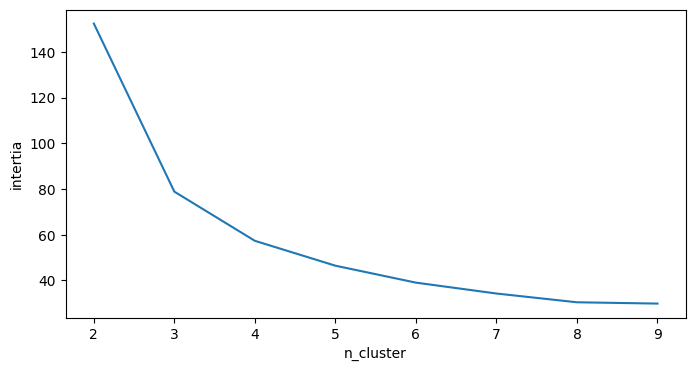

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

## 2.3 Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


Voici les clusters :

In [26]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

-- **ATTENTION** --  
Ici, `0`,`1`,`2` est à considérer comme une **variable catégorielle cardinale**. Il n'y a pas d'ordre entre les clusters.

Le cluster `0` n'est pas *supérieur* au cluster `1` par exemple. Considérez que c'est plus un *id* qu'une *valeur*.






Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:


In [27]:
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [28]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

Disons que c'est plus clair maintenant...


Ajoutons nos labels à `X`

In [29]:
X["cluster"] = labels
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,a
1,4.9,3.0,1.4,0.2,a
2,4.7,3.2,1.3,0.2,a
3,4.6,3.1,1.5,0.2,a
4,5.0,3.6,1.4,0.2,a
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c
146,6.3,2.5,5.0,1.9,b
147,6.5,3.0,5.2,2.0,c
148,6.2,3.4,5.4,2.3,c


Affichons cela de façon graphique :

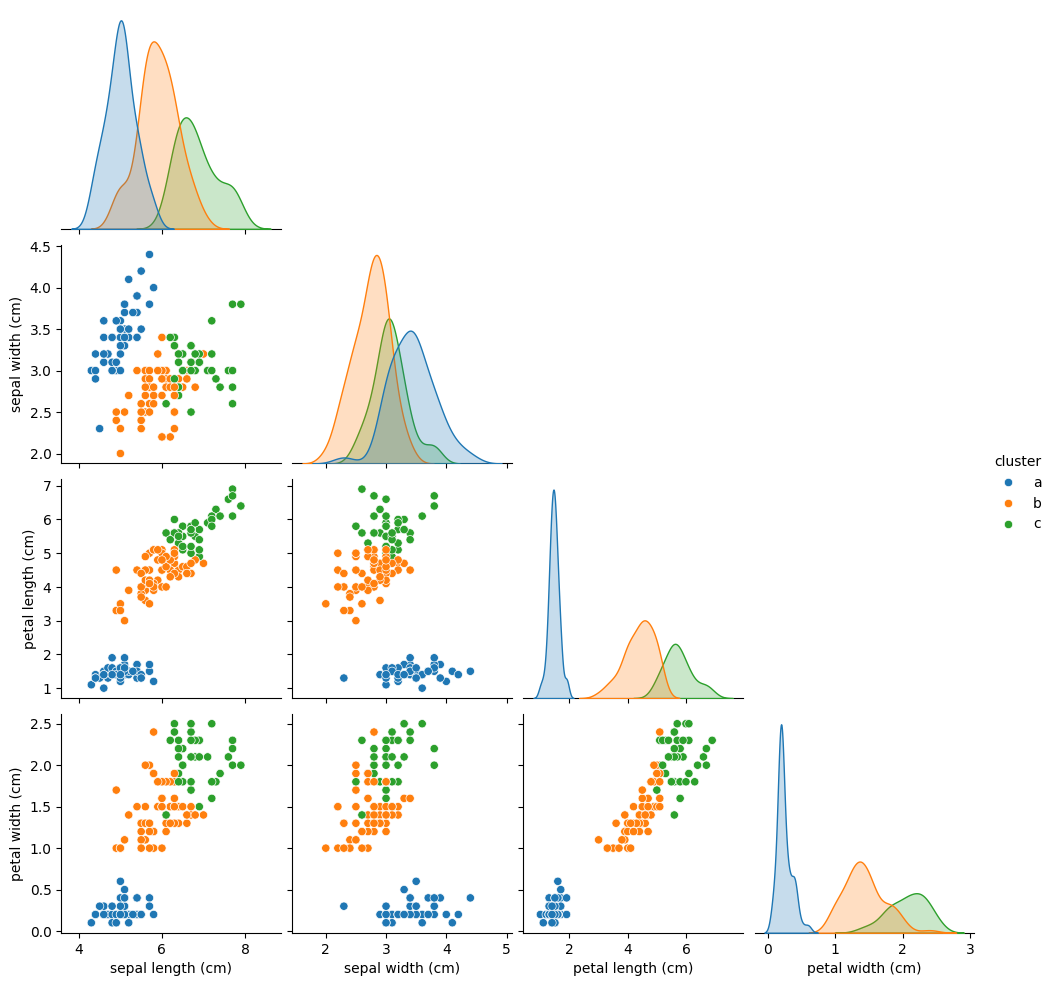

In [31]:
sns.pairplot(X, hue="cluster", corner=True)